In [85]:
import numpy as np

from constants import *
from scripts.scripts import *
from scripts.gdal_scripts import *

In [86]:
main_name = "test_grid02"
gdal_print_metadata(tif_name=main_name)

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02.tif
Size is 256, 256
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000002829859375,0.000001506484375)
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) 
Lower Left  (   9.0658430,  56.8351945) 
Upper Right (   9.0665675,  56.8348089) 
Lower Right (   9.0665675,  56.8351945) 
Center      (   9.0662053,  56.8350017) 
Band 1 Block=256x16 Type=Int16, ColorInterp=Gray



In [87]:
df = get_pandas_from_csv(csv_name=main_name+"_coor")

In [90]:
import numpy as np
df[df["value"] >= 50]

PE_Conditions = [
    (df['value'] < 50),
    (df['value'] >= 50),]
PE_Categories = [25, 75]
df['simp_value'] = np.select(PE_Conditions, PE_Categories)
df

,Unnamed: 0,lat,lon,value,simp_value
0,0,56.835195,9.065843,100,75
1,1,56.835185,9.065843,100,75
2,2,56.835176,9.065843,80,75
3,3,56.835167,9.065843,80,75
4,4,56.835158,9.065843,80,75
...,...,...,...,...,...
425,425,56.834846,9.066567,0,25
426,426,56.834836,9.066567,0,25
427,427,56.834827,9.066567,0,25
428,428,56.834818,9.066567,0,25


In [92]:
geo_df = dataframe_to_shp(input_df=df)

In [93]:
geo_df

,Unnamed: 0,lat,lon,value,simp_value,geometry
0,0,56.835195,9.065843,100,75,POINT (9.06584 56.83519)
1,1,56.835185,9.065843,100,75,POINT (9.06584 56.83519)
2,2,56.835176,9.065843,80,75,POINT (9.06584 56.83518)
3,3,56.835167,9.065843,80,75,POINT (9.06584 56.83517)
4,4,56.835158,9.065843,80,75,POINT (9.06584 56.83516)
...,...,...,...,...,...,...
425,425,56.834846,9.066567,0,25,POINT (9.06657 56.83485)
426,426,56.834836,9.066567,0,25,POINT (9.06657 56.83484)
427,427,56.834827,9.066567,0,25,POINT (9.06657 56.83483)
428,428,56.834818,9.066567,0,25,POINT (9.06657 56.83482)


In [94]:
geo_df = geo_df.drop(columns=['Unnamed: 0','value','lat','lon'])

In [118]:
geo_df

,simp_value,geometry
0,75,POINT (9.06584 56.83519)
1,75,POINT (9.06584 56.83519)
2,75,POINT (9.06584 56.83518)
3,75,POINT (9.06584 56.83517)
4,75,POINT (9.06584 56.83516)
...,...,...
425,25,POINT (9.06657 56.83485)
426,25,POINT (9.06657 56.83484)
427,25,POINT (9.06657 56.83483)
428,25,POINT (9.06657 56.83482)


In [121]:
tif_name = "test_grid02_full_spread"
geo_df.to_file(filename=SHP_PATH+tif_name+'.shp.zip', driver='ESRI Shapefile', crs='EPSG:4326')

In [122]:
tif_name_full = gdal_run_interpolation(
    input_shp_name=tif_name,
    target_column="simp_value",
    output_tif_name=tif_name,
    algorithm="nearest",
    radius1=0.00006,
    radius2=0.00003,
    width=64,
    height=64,
)

Options:  ['-of', 'Gtiff', '-ot', 'Byte', '-outsize', '64', '64', '-a', 'nearest:power=1:radius1=6e-05:radius2=3e-05:', '-zfield', 'simp_value']
Running interpolation on: shapefiles/test_grid02_full_spread.shp.zip
Saving to: tif_files/test_grid02_full_spread-nearest-1-None-6e-05-3e-05-None-0-0.tif


In [123]:
gdal_print_metadata(tif_name=tif_name_full)

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02_full_spread-nearest-1-None-6e-05-3e-05-None-0-0.tif
Size is 64, 64
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000011319437500,0.000006025937500)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) (  9d 3'57.03"E, 56d50' 5.31"N)
Lower Left  (   9.0658430,  56.8351945) (  9d 3'57.03

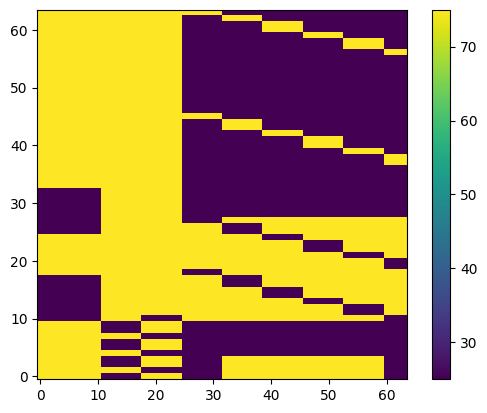

In [125]:
plot_raster(tif_name=tif_name_full)

In [126]:
tif_name_full

'test_grid02_full_spread-nearest-1-None-6e-05-3e-05-None-0-0'

In [146]:
make_polygons(
    input_tif=tif_name_full,
    mask='none',
    options=["-mask",tif_name_full]
)

In [147]:
shp = gdal_open_shp(shp_name=tif_name_full)

In [148]:
import geopandas as gp


In [149]:
tif_name_full

'test_grid02_full_spread-nearest-1-None-6e-05-3e-05-None-0-0'

In [163]:
file

,DN,geometry
0,25.0,"POLYGON ((9.06597 56.83481, 9.06597 56.83481, ..."
3,25.0,"POLYGON ((9.06597 56.83482, 9.06597 56.83483, ..."
6,25.0,"POLYGON ((9.06597 56.83484, 9.06597 56.83485, ..."
8,25.0,"POLYGON ((9.06613 56.83481, 9.06613 56.83481, ..."
9,25.0,"POLYGON ((9.06597 56.83486, 9.06597 56.83487, ..."
11,25.0,"POLYGON ((9.06605 56.83487, 9.06605 56.83488, ..."
12,25.0,"POLYGON ((9.06644 56.83488, 9.06644 56.83489, ..."
13,25.0,"POLYGON ((9.06584 56.83487, 9.06584 56.83492, ..."
14,25.0,"POLYGON ((9.06636 56.83489, 9.06636 56.83489, ..."
15,25.0,"POLYGON ((9.06628 56.83489, 9.06628 56.83491, ..."


In [158]:
file = gp.read_file(SHP_PATH+tif_name_full+'.shp.zip')

<Axes: >

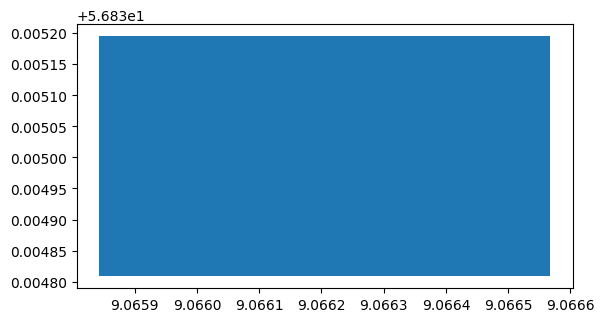

In [159]:
file.plot()

In [160]:
file = file[file['DN']==25.0]

<Axes: >

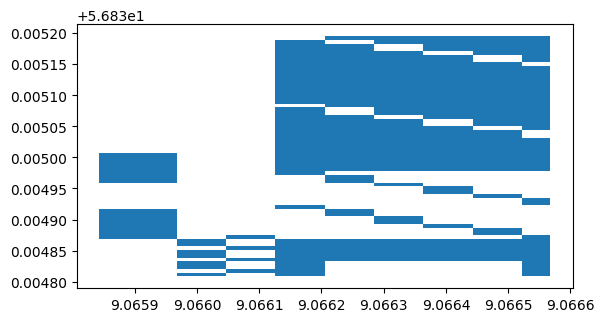

In [161]:
file.plot()

In [162]:
file.to_file(SHP_PATH+"new25"+'.shp.zip', driver='ESRI Shapefile')

In [59]:
file = gp.read_file(SHP_PATH+tif_name_full+'.shp.zip')

In [165]:
from osgeo_utils.samples import ogr2ogr
def main():
  #note: main is expecting sys.argv, where the first argument is the script name
  #so, the argument indices in the array need to be offset by 1
  ogr2ogr.main(["","-f", "KML", "out75.kml", SHP_PATH+"new75.shp.zip","-nlt","PROMOTE_TO_MULTI", "-simplify", "0.000001"])
main()